<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import json
import os
import numpy as np
from json2table import convert
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import math

In [2]:
def load_run(path):
    # load info.json
    with open(os.path.join(path, 'info.json'), 'r') as f:
        info = json.load(f)
    return info
    
def plot_errors(base_dir, title=""):
    runs = list(filter(lambda d: not d.startswith('_'), os.listdir(base_dir)))

    means = []
    stds = []
    for run in runs:
        info = load_run(os.path.join(base_dir, run))

        means.append(info['error']['euclid']['mean_percent'])
        stds.append(info['error']['euclid']['std_percent'])

    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
    fig.suptitle(title)
    ax[0].set_title('Euclidean mean error %')
    ax[0].set_xlabel('run')
    ax[0].set_ylabel('error')
    ax[0].plot([np.mean(means) for x in range(len(means))], label='mean mean error')
    ax[0].plot(means, '.', label='mean error', markersize=15)
    ax[0].grid()
    ax[0].legend()

    ax[1].set_title('Euclidean mean error standard deviation %')
    ax[1].set_xlabel('run')
    ax[1].set_ylabel('std')
    ax[1].plot([np.mean(stds) for x in range(len(stds))], label='mean mean std')
    ax[1].plot(stds, '.', label='mean std', markersize=15)
    ax[1].grid()
    ax[1].legend()
    
    
def print_errors(base_dir):
    runs = list(filter(lambda d: not d.startswith('_'), os.listdir(base_dir)))
    
    for run in runs:
        info = load_run(os.path.join(base_dir, run))
        
        html = convert(info['error'], build_direction='TOP_TO_BOTTOM')
        display(HTML(html))

In [3]:
%matplotlib inline
#plot_errors("check/240x100/runs/hybrid", title='240x100')
#plot_errors("check/240x200/test", title='240x200')
print_errors("check/240x100/runs/hybrid")

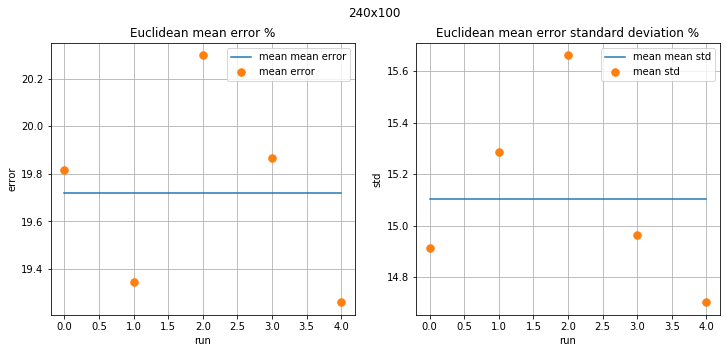

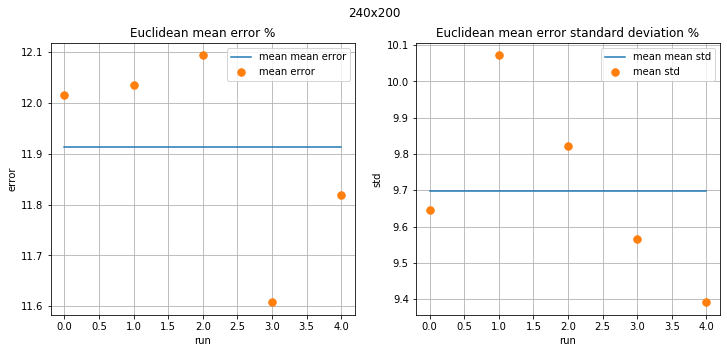

In [5]:
%matplotlib inline
plot_errors("check/240x100/runs/obstacle", title='240x100')
plot_errors("check/240x200/runs/obstacle", title='240x200')
#print_errors("check/runs/obstacle")

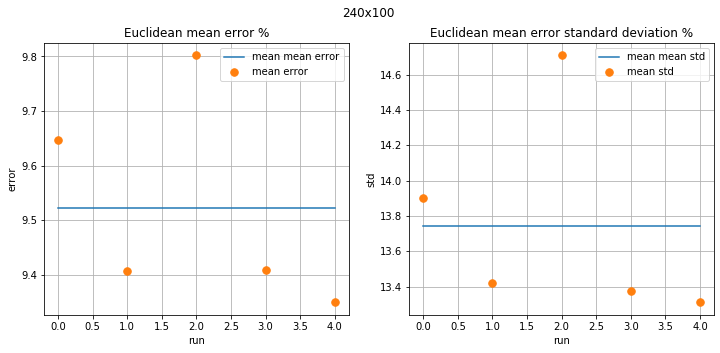

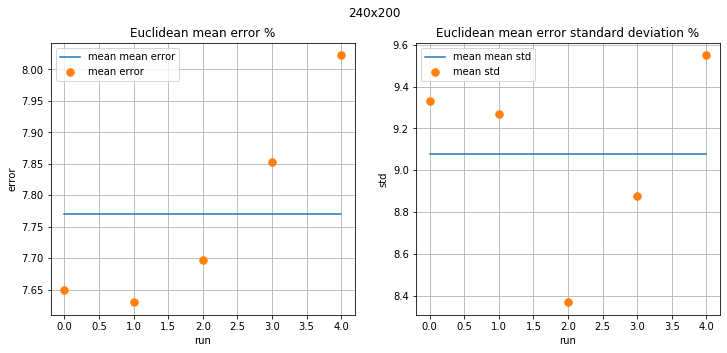

In [5]:
%matplotlib inline
plot_errors("check/240x100/runs/experiment", title='240x100')
plot_errors("check/240x200/runs/experiment", title='240x200')
#print_errors("check/runs/experiment")

In [8]:
# print_errors("check/240x200/runs/obstacle")
# print_errors("check/240x200/runs/experiment")
print_errors("check/240x200/runs/hybrid")